##  lock

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## no lock time takes

In [61]:
timeTakes = pd.read_excel('./no-lock-dict/time_takes_nolock.xlsx', index_col=0)


timeTakes

,0,100,200,300,400,500
normal,0,518.256230,983.613122,1484.333219,1938.165589,2507.224577
all rollback,0,925.555784,1765.868254,2538.915759,3479.005671,4409.458739
service1 reject,0,734.178417,1348.076560,2037.186929,2570.245747,3244.459798
service 2 reject,0,766.680192,1490.162672,2117.923435,2617.077232,3423.649910
all reject,0,424.963842,780.082461,1128.454956,1544.380336,1965.455506


In [62]:
timeTakes.T

,normal,all rollback,service1 reject,service 2 reject,all reject
0,0.000000,0.000000,0.000000,0.000000,0.000000
100,518.256230,925.555784,734.178417,766.680192,424.963842
200,983.613122,1765.868254,1348.076560,1490.162672,780.082461
300,1484.333219,2538.915759,2037.186929,2117.923435,1128.454956
400,1938.165589,3479.005671,2570.245747,2617.077232,1544.380336
500,2507.224577,4409.458739,3244.459798,3423.649910,1965.455506


In [63]:
timeTakes.T[timeTakes.T.columns[0]]

0         0.000000
100     518.256230
200     983.613122
300    1484.333219
400    1938.165589
500    2507.224577
Name: normal, dtype: float64

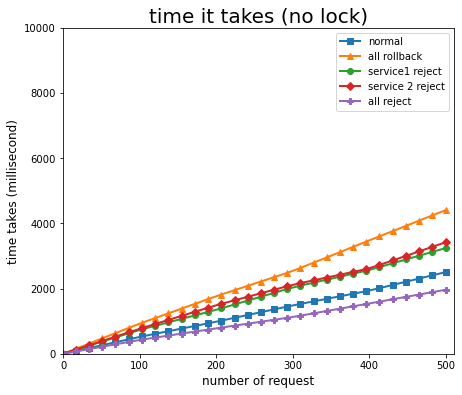

In [64]:

plt.figure(figsize=(7,6))
markerList = ['s','^','o','D','P']

plt.ylabel('time takes (millisecond)', fontsize=12)
plt.xlabel('number of request', fontsize=12)


y_per_second = []
x_per_second = []
labels = timeTakes.T.columns

for i in range(5):
    x = timeTakes.T.index
    y = timeTakes.T[timeTakes.T.columns[i]]
    xnew = np.linspace(x.min(), x.max(), 30,dtype = int)
    x_per_second.append(xnew)
    y_smooth = interp1d(x, y, kind = 'linear')
    y_per_second.append([x/(y/1000) if y != 0 else 0 for x, y in zip(xnew, y_smooth(xnew))])
    plt.plot(xnew, y_smooth(xnew), label = timeTakes.T.columns[i], lw=2, marker=markerList[i], ms=6) # square
#     plt.plot(x, y, label = timeTakes.T.columns[i], lw=2, marker=markerList[i], ms=6) # square

    

#plt.plot(timeTakes.T.index, timeTakes.T['normal'], label = 'normal', lw=2, marker='s', ms=10) # square
# plt.plot(y1, y3, label = 'Y1-Y3', lw=2, marker='^', ms=10) # triangle
# plt.plot(y1, y4, label = 'Y1-Y4', lw=2, marker='o', ms=10) # circle
# plt.plot(y1, y5, label = 'Y1-Y5', lw=2, marker='D', ms=10) # diamond
# plt.plot(y2, y5, label = 'Y2-Y5', lw=2, marker='P', ms=10) # filled plus sign
plt.ylim([0, 10000])
plt.xlim([0, 510])


plt.title("time it takes (no lock)", fontsize=20)
plt.legend()
plt.show()

In [65]:
x_per_second

[array([  0,  17,  34,  51,  68,  86, 103, 120, 137, 155, 172, 189, 206,
        224, 241, 258, 275, 293, 310, 327, 344, 362, 379, 396, 413, 431,
        448, 465, 482, 500]),
 array([  0,  17,  34,  51,  68,  86, 103, 120, 137, 155, 172, 189, 206,
        224, 241, 258, 275, 293, 310, 327, 344, 362, 379, 396, 413, 431,
        448, 465, 482, 500]),
 array([  0,  17,  34,  51,  68,  86, 103, 120, 137, 155, 172, 189, 206,
        224, 241, 258, 275, 293, 310, 327, 344, 362, 379, 396, 413, 431,
        448, 465, 482, 500]),
 array([  0,  17,  34,  51,  68,  86, 103, 120, 137, 155, 172, 189, 206,
        224, 241, 258, 275, 293, 310, 327, 344, 362, 379, 396, 413, 431,
        448, 465, 482, 500]),
 array([  0,  17,  34,  51,  68,  86, 103, 120, 137, 155, 172, 189, 206,
        224, 241, 258, 275, 293, 310, 327, 344, 362, 379, 396, 413, 431,
        448, 465, 482, 500])]

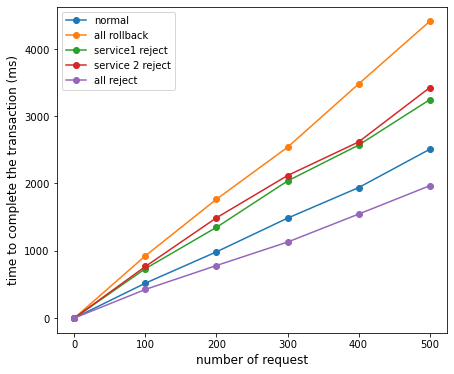

In [66]:
ax = timeTakes.T.plot(figsize=(7, 6), marker='o')
ax.set_ylabel('time to complete the transaction (ms)', fontsize=12)
ax.set_xlabel('number of request', fontsize=12)
plt.show()

## nolock request per second

In [67]:
# perSecond = pd.read_excel('per_second_nolock.xlsx', index_col=0)
# perSecond

In [68]:
# ax = perSecond.T.plot(figsize=(7, 6))
# ax.set_ylabel('number of request per second', fontsize=12)
# ax.set_xlabel('total request', fontsize=12)
# plt.show()

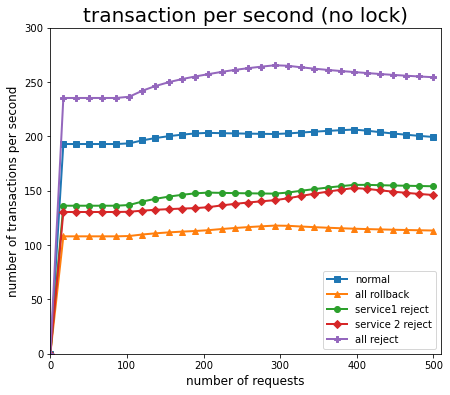

In [69]:


# ax.set_ylabel('number of request per second', fontsize=12)
# ax.set_xlabel('total request', fontsize=12)

plt.figure(figsize=(7,6))
plt.ylabel('number of transactions per second', fontsize=12)
plt.xlabel('number of requests', fontsize=12)

markerList = ['s','^','o','D','P']



for i in range(5):
#     x = perSecond.T.index
#     y = perSecond.T[perSecond.T.columns[i]]
#     xnew = np.linspace(x.min(), x.max(), 30)
#     y_smooth = interp1d(x, y, kind = 'quadratic')
    x = x_per_second[i]
    y = y_per_second[i]
    plt.plot(x, y, label = labels[i], lw=2, marker=markerList[i], ms=6) # square
#     plt.plot(x, y, label = timeTakes.T.columns[i], lw=2, marker=markerList[i], ms=6) # square

plt.ylim([0, 300])
plt.xlim([0, 510])

plt.title("transaction per second (no lock)", fontsize=20)
plt.legend()
plt.show()

service1 compensate: insert delete

service compensate: +1 -1



## lock time takes

In [57]:
timeTakes = pd.read_excel('./lock-dict/time_takes_lock.xlsx', index_col=0)

timeTakes

,0,100,200,300,400,500
normal,0,1337.096696,2372.021207,3583.201090,4735.662736,5886.978604
all rollback,0,1684.424484,3236.107427,4893.131011,6528.326750,8244.554036
service1 reject,0,1418.552180,2782.384562,4083.769379,5481.377892,6984.437002
service 2 reject,0,1609.892245,2973.918478,4408.365362,6086.516802,7635.341687
all reject,0,844.844461,1564.438154,2016.450815,2825.759700,3336.893149


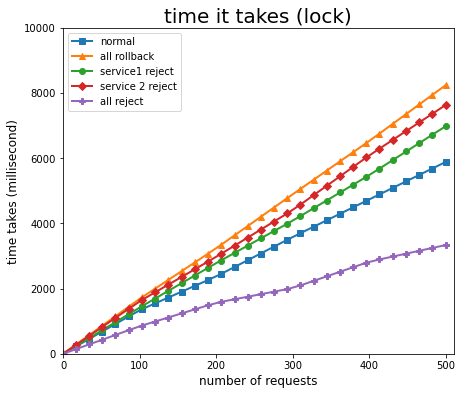

In [58]:


plt.figure(figsize=(7,6))
markerList = ['s','^','o','D','P']
plt.ylabel('time takes (millisecond)', fontsize=12)
plt.xlabel('number of requests', fontsize=12)



y_per_second = []
x_per_second = []

labels = timeTakes.T.columns

for i in range(5):
    x = timeTakes.T.index
    y = timeTakes.T[timeTakes.T.columns[i]]
    xnew = np.linspace(x.min(), x.max(), 30,dtype = int)
    x_per_second.append(xnew)
    y_smooth = interp1d(x, y, kind = 'linear')
    y_per_second.append([x/(y/1000) if y != 0 else 0 for x, y in zip(xnew, y_smooth(xnew))])
    plt.plot(xnew, y_smooth(xnew), label = timeTakes.T.columns[i], lw=2, marker=markerList[i], ms=6)

#plt.plot(timeTakes.T.index, timeTakes.T['normal'], label = 'normal', lw=2, marker='s', ms=10) # square
# plt.plot(y1, y3, label = 'Y1-Y3', lw=2, marker='^', ms=10) # triangle
# plt.plot(y1, y4, label = 'Y1-Y4', lw=2, marker='o', ms=10) # circle
# plt.plot(y1, y5, label = 'Y1-Y5', lw=2, marker='D', ms=10) # diamond
# plt.plot(y2, y5, label = 'Y2-Y5', lw=2, marker='P', ms=10) # filled plus sign
plt.ylim([0, 10000])
plt.xlim([0, 510])
plt.title("time it takes (lock)", fontsize=20)
plt.legend()

plt.show()

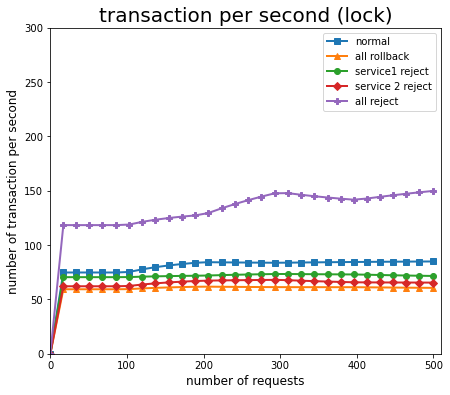

In [59]:
plt.figure(figsize=(7,6))
markerList = ['s','^','o','D','P']

plt.ylabel('number of transaction per second', fontsize=12)
plt.xlabel('number of requests', fontsize=12)

for i in range(5):
#     x = perSecond.T.index
#     y = perSecond.T[perSecond.T.columns[i]]
#     xnew = np.linspace(x.min(), x.max(), 30)
#     y_smooth = interp1d(x, y, kind = 'quadratic')
    x = x_per_second[i]
    y = y_per_second[i]
    plt.plot(x, y, label = labels[i], lw=2, marker=markerList[i], ms=6) # square
#     plt.plot(x, y, label = timeTakes.T.columns[i], lw=2, marker=markerList[i], ms=6) # square
plt.ylim([0, 300])
plt.xlim([0, 510])
plt.title("transaction per second (lock)", fontsize=20)
plt.legend()
plt.show()

In [2]:
timeTakes = pd.read_excel('./short/time_takes_short.xlsx', index_col=0)

timeTakes

,0,100,200,300,400,500
normal,0,165.35708,334.991692,484.073153,611.662294,800.697294


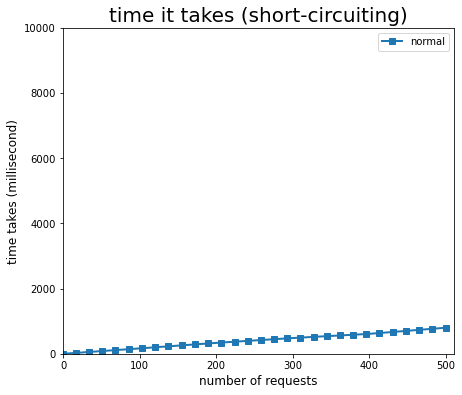

In [3]:
plt.figure(figsize=(7,6))
markerList = ['s','^','o','D','P']

plt.ylabel('time takes (millisecond)', fontsize=12)
plt.xlabel('number of requests', fontsize=12)


y_per_second = []
x_per_second = []
labels = timeTakes.T.columns

for i in range(1):
    x = timeTakes.T.index
    y = timeTakes.T[timeTakes.T.columns[i]]
    xnew = np.linspace(x.min(), x.max(), 30,dtype = int)
    x_per_second.append(xnew)
    y_smooth = interp1d(x, y, kind = 'linear')
    y_per_second.append([x/(y/1000) if y != 0 else 0 for x, y in zip(xnew, y_smooth(xnew))])
    plt.plot(xnew, y_smooth(xnew), label = timeTakes.T.columns[i], lw=2, marker=markerList[i], ms=6) # square
#     plt.plot(x, y, label = timeTakes.T.columns[i], lw=2, marker=markerList[i], ms=6) # square

    

#plt.plot(timeTakes.T.index, timeTakes.T['normal'], label = 'normal', lw=2, marker='s', ms=10) # square
# plt.plot(y1, y3, label = 'Y1-Y3', lw=2, marker='^', ms=10) # triangle
# plt.plot(y1, y4, label = 'Y1-Y4', lw=2, marker='o', ms=10) # circle
# plt.plot(y1, y5, label = 'Y1-Y5', lw=2, marker='D', ms=10) # diamond
# plt.plot(y2, y5, label = 'Y2-Y5', lw=2, marker='P', ms=10) # filled plus sign
plt.ylim([0, 10000])
plt.xlim([0, 510])


plt.title("time it takes (short-circuiting)", fontsize=20)
plt.legend()
plt.show()

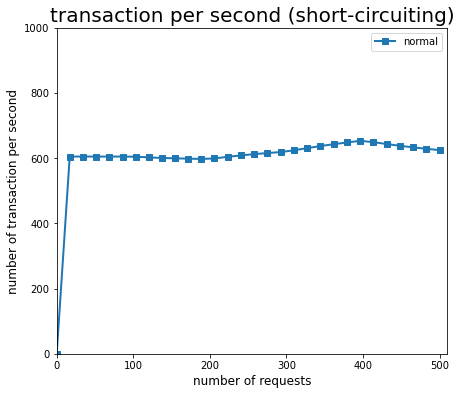

In [4]:
plt.figure(figsize=(7,6))
markerList = ['s','^','o','D','P']

plt.ylabel('number of transaction per second', fontsize=12)
plt.xlabel('number of requests', fontsize=12)

for i in range(1):
#     x = perSecond.T.index
#     y = perSecond.T[perSecond.T.columns[i]]
#     xnew = np.linspace(x.min(), x.max(), 30)
#     y_smooth = interp1d(x, y, kind = 'quadratic')
    x = x_per_second[i]
    y = y_per_second[i]
    plt.plot(x, y, label = labels[i], lw=2, marker=markerList[i], ms=6) # square
#     plt.plot(x, y, label = timeTakes.T.columns[i], lw=2, marker=markerList[i], ms=6) # square
plt.ylim([0, 1000])
plt.xlim([0, 510])
plt.title("transaction per second (short-circuiting)", fontsize=20)
plt.legend()
plt.show()